## Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set()

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
#load the dataset

data = pd.read_csv('Property_Valuation_Data.csv',encoding = 'latin1')
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,$38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,$204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,$600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,$63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,$370.00


In [3]:
data.shape

(13320, 9)

In [4]:
print(data.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [5]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price            object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [7]:
data.dtypes[data.dtypes == 'object']

area_type       object
availability    object
location        object
size            object
society         object
total_sqft      object
price           object
dtype: object

In [8]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [9]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17


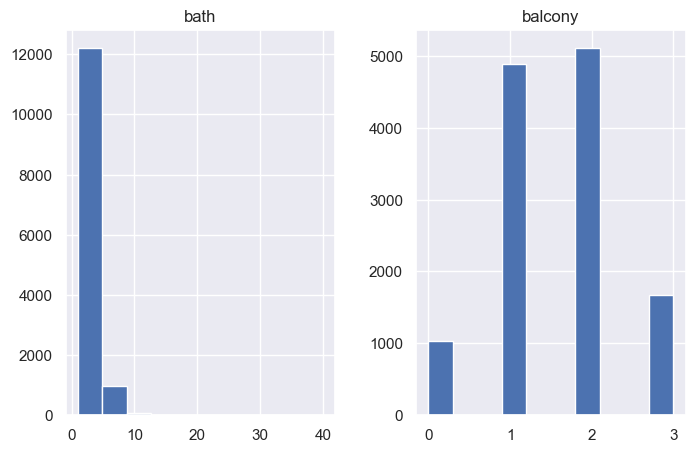

In [10]:
data.hist(figsize=(8, 5))

plt.show()

In [11]:
data.describe()

,bath,balcony
count,13247.000000,12711.000000
mean,2.692610,1.584376
std,1.341458,0.817263
min,1.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,40.000000,3.000000


In [12]:
data.describe(include='object')

,area_type,availability,location,size,society,total_sqft,price
count,13320,13320,13319,13304,7818,13320,13320
unique,4,81,1305,31,2688,2117,2205
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,75
freq,8790,10581,540,5199,80,843,303


<Axes: xlabel='count', ylabel='area_type'>

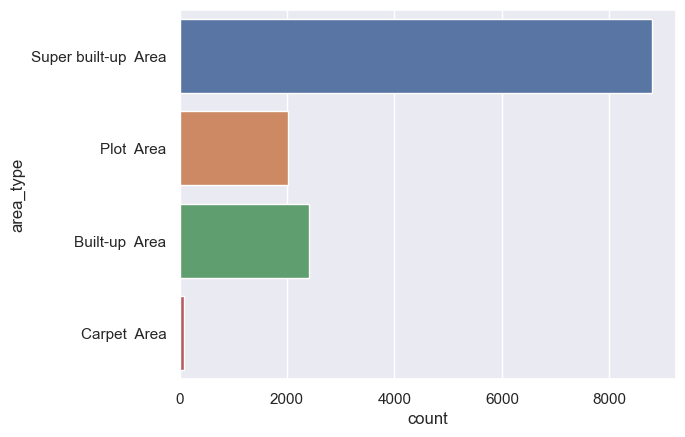

In [13]:
sns.countplot(y='area_type', data=data)

In [14]:
#Check the duplicates

data.duplicated().sum()

511

In [15]:
data[data.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57


In [16]:
#Created the new copy as data_cleaned
data_cleaned = data.drop_duplicates(keep='first')

In [17]:
data_cleaned = pd.DataFrame(data_cleaned)

In [18]:
data_cleaned.duplicated().sum()

0

In [19]:
unique_counts = []

for col in data_cleaned.columns:
    unique_counts.append((col, data_cleaned[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x:x[1], reverse=True)

print("No of unique values in each columns are as follows :(In Descending order)\n")

for col, nunique in unique_counts:
    print(f"{col} : {nunique} : {round(nunique/13320*100,2)}%")

No of unique values in each columns are as follows :(In Descending order)

society : 2688 : 20.18%
price : 2205 : 16.55%
total_sqft : 2117 : 15.89%
location : 1305 : 9.8%
availability : 81 : 0.61%
size : 31 : 0.23%
bath : 19 : 0.14%
area_type : 4 : 0.03%
balcony : 4 : 0.03%


### Missing values Details

In [20]:
def get_missing_data_details(df):
   
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])

    plt.figure(figsize=(5,5))
    sns.barplot(x=missing['Percent'], y=missing.index)
    plt.xlabel('Feature', fontsize=15)
    plt.ylabel("Percentage", fontsize=15)
    plt.title("Missing Data %", fontsize=15)

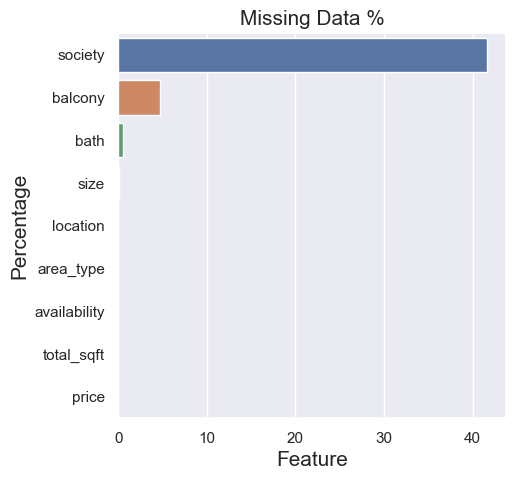

In [21]:
get_missing_data_details(data_cleaned)

In [22]:
for col in data_cleaned.columns:
    if data_cleaned[col].isnull().sum()!=0:
        print(f"{col}: {data_cleaned[col].isnull().sum()}: {round(data_cleaned[col].isnull().mean()*100, 2)}%")

location: 1: 0.01%
size: 16: 0.12%
society: 5335: 41.65%
bath: 73: 0.57%
balcony: 605: 4.72%


In [23]:
data_cleaned.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,12809,12809,12808,12793,7474,12809,12736.000000,12204.000000,12809
unique,4,81,1305,31,2688,2117,NaN,NaN,2205
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,75
freq,8332,10186,524,4942,69,809,NaN,NaN,293
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.707522,1.582022,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.357193,0.822275,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN


In [24]:
data_cleaned.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [25]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12809 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12808 non-null  object 
 3   size          12793 non-null  object 
 4   society       7474 non-null   object 
 5   total_sqft    12809 non-null  object 
 6   bath          12736 non-null  float64
 7   balcony       12204 non-null  float64
 8   price         12809 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1000.7+ KB


In [26]:
data_cleaned.isna().sum()/100

area_type        0.00
availability     0.00
location         0.01
size             0.16
society         53.35
total_sqft       0.00
bath             0.73
balcony          6.05
price            0.00
dtype: float64

In [27]:
# - Relevant vs Irrelevant columns

# area_type - object 
#availability - object
#location - object
#size - object to numeric
#society - object - Large number of missing values fill with mode
#total_sqft - object to numeric
#bath -  float64
#balcony -  float64
#price - object to float


In [28]:

data_cleaned['size_converted'] = data_cleaned['size'].apply(lambda x: float(re.search(r'\d+', x).group()) if type(x) == str and re.search(r'\d+', x) else np.nan)


In [29]:
def impute_society_by_location(df):
   
    df['society'] = df.groupby('location')['society'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
    )
    return df


data_cleaned['society_converted'] = impute_society_by_location(data_cleaned)['society']

In [30]:
def convert_to_sq_meter(value):
    
    value = re.sub(r'[^\d.-]', '', value)
    
    if '-' in value:
        parts = value.split('-')
        try:
            avg = (float(parts[0]) + float(parts[1])) / 2
            return avg
        except ValueError:
            return pd.NA

    try:
        value = float(value)
    except ValueError:
        return pd.NA
    
   
    if 'Perch' in value:
        return value * 25.2929
    elif 'Sq. Yard' in value:
        return value * 0.836127
    elif 'Sq. Meter' in value or not value:
        return value
    else:
        return pd.NA


In [31]:
data_cleaned['total_sqft_converted'] = pd.to_numeric(data_cleaned['total_sqft'], errors='coerce')

In [32]:
data_cleaned['price'].unique()

array([' $39.07 ', ' $120.00 ', ' $62.00 ', ..., '40.14', '231', '488'],
      dtype=object)

In [33]:
data_cleaned.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_converted,society_converted,total_sqft_converted
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,2.0,Coomee,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,4.0,Theanmp,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1440,2.0,3.0,$62.00,3.0,Aklia R,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,3.0,Soiewre,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Somumys,1200,2.0,1.0,$51.00,2.0,Somumys,1200.0


In [34]:
usd_to_eur = 1.1  
usd_to_inr = 0.012  

def clean_and_convert_price(value):
    if pd.isna(value):
        return pd.NA

    if isinstance(value, str):
        value = value.strip()  # Strip whitespace

        # Handle range values
        if '-' in value:
            parts = value.split('-')
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except ValueError:
                return pd.NA
        
        value = re.sub(r'[^\d.]', '', value)

    try:
        return float(value)
    except ValueError:
        return pd.NA

def convert_currency(value, symbol):
    if symbol == '$':
        return value
    elif symbol == '€':
        return value / usd_to_eur
    elif symbol == '₹':
        return value * usd_to_inr
    else:
        return value  

def process_price(value):
    symbol = ''
    if isinstance(value, str):
        if '$' in value:
            symbol = '$'
        elif '€' in value:
            symbol = '€'
        elif '₹' in value:
            symbol = '₹'
        elif '?' in value:
            symbol = '?'  

    value = clean_and_convert_price(value)
    
   
    
    value = convert_currency(value, symbol)
    
    
    return value


In [35]:
data_cleaned['price_converted'] = data_cleaned['price'].apply(process_price)

In [36]:
data_cleaned.dtypes

area_type                object
availability             object
location                 object
size                     object
society                  object
total_sqft               object
bath                    float64
balcony                 float64
price                    object
size_converted          float64
society_converted        object
total_sqft_converted    float64
price_converted         float64
dtype: object

In [37]:
#univariate analysis
num_col = []

for i in data_cleaned:
    if data_cleaned[i].dtype != object:
        num_col.append(i)

In [38]:
cat_col = []

for i in data_cleaned:
    if data_cleaned[i].dtype == object:
        cat_col.append(i)

In [39]:
print(f'Numerical columns list : {num_col}\n')
print(f'Categorical columns list : {cat_col}')

Numerical columns list : ['bath', 'balcony', 'size_converted', 'total_sqft_converted', 'price_converted']

Categorical columns list : ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'price', 'society_converted']


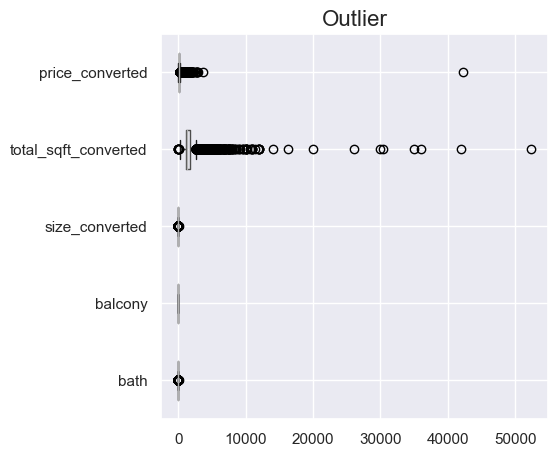

In [40]:
plt.figure(figsize=(5,5))
data_cleaned[num_col].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

In [41]:
data_cleaned[num_col].max().sort_values()

balcony                     3.0
bath                       40.0
size_converted             43.0
price_converted         42278.0
total_sqft_converted    52272.0
dtype: float64

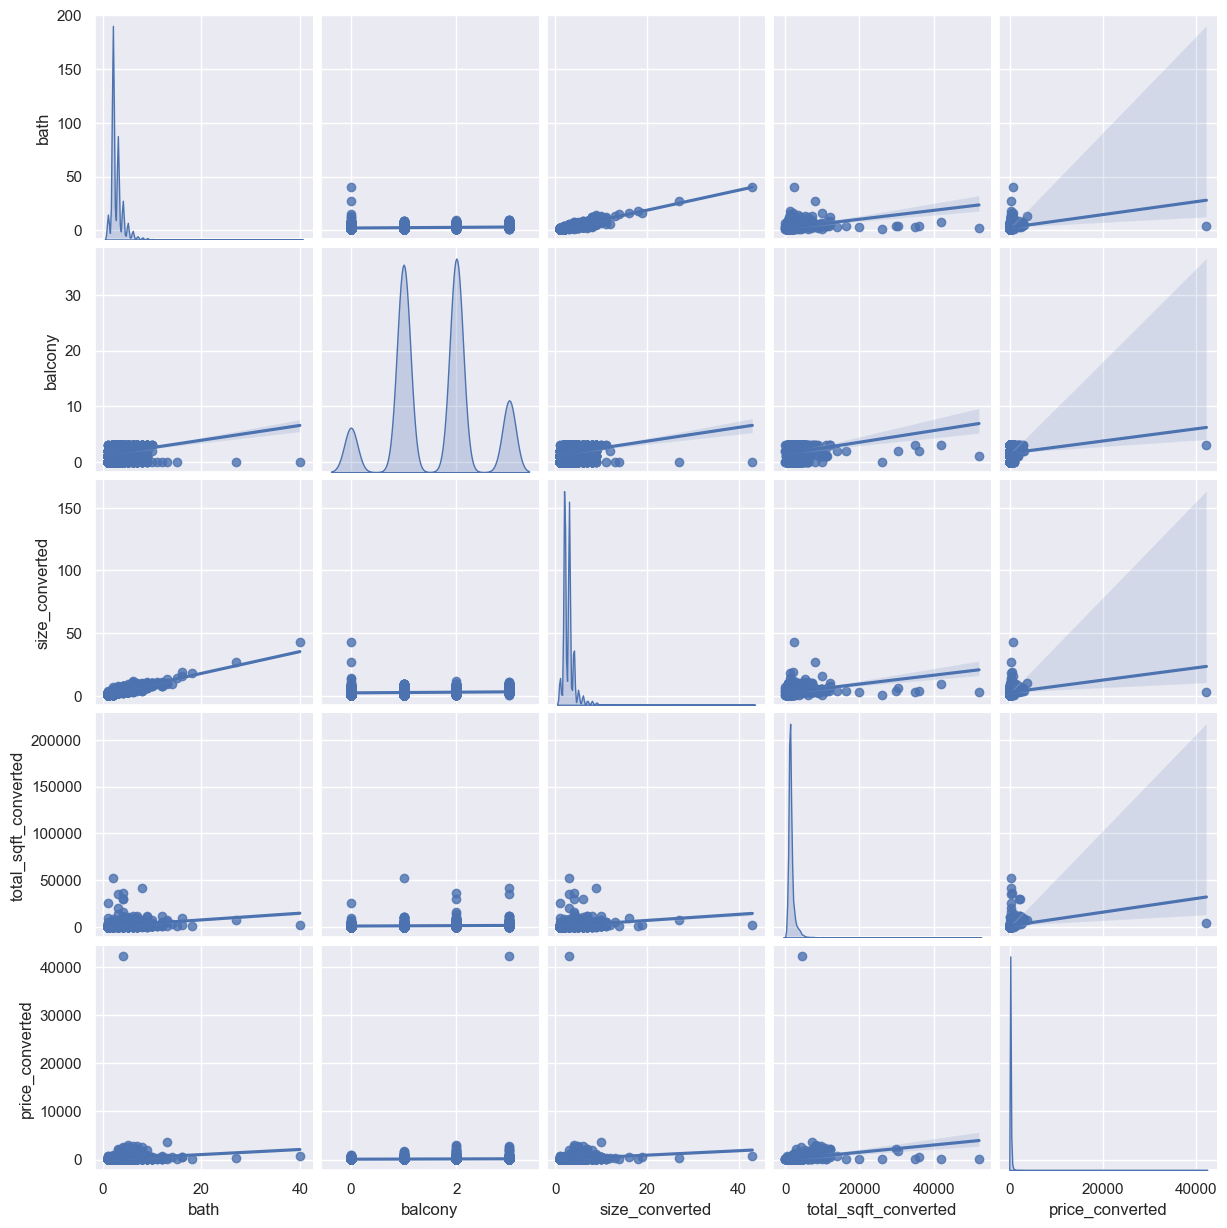

In [42]:
#BiVariate analysis
sns.pairplot(data=data_cleaned[num_col],kind='reg', diag_kind='kde')

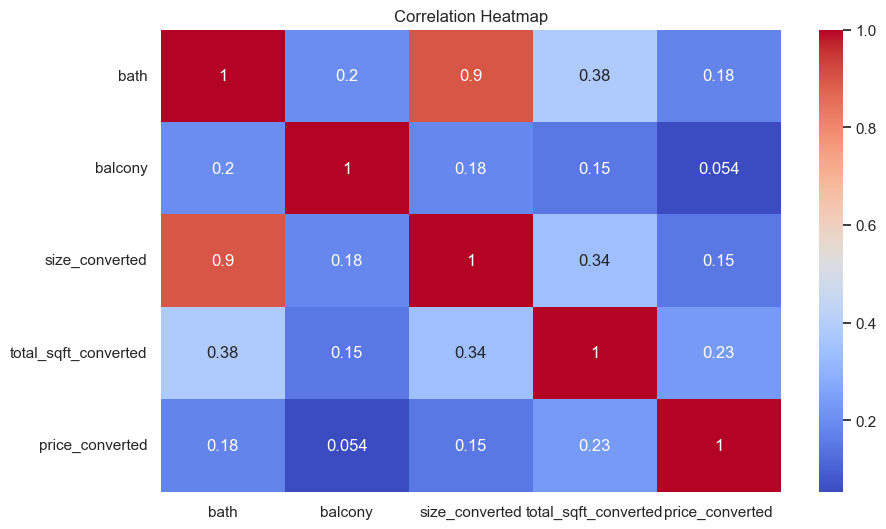

In [43]:
# HEAT MAP

plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[num_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
     

In [44]:
data_cleaned.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'size_converted',
       'society_converted', 'total_sqft_converted', 'price_converted'],
      dtype='object')

# Data Preprocessing

In [45]:
data_new = data_cleaned.copy()

In [46]:
data_new.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'size_converted',
       'society_converted', 'total_sqft_converted', 'price_converted'],
      dtype='object')

In [47]:
print(data_cleaned.shape)
data_new.drop(['size','society','total_sqft','price'], axis=1, inplace=True)
print(data_new.shape)


(12809, 13)
(12809, 9)


### Check Duplicates 

In [48]:
data_new.duplicated().sum()

39

In [49]:
data_new=data_new.drop_duplicates(ignore_index=True)

In [50]:
data_new.duplicated().sum()

0

### Check Missing Values

In [51]:
data_new.isnull().sum()

area_type                 0
availability              0
location                  1
bath                     73
balcony                 605
size_converted           16
society_converted         1
total_sqft_converted    245
price_converted           0
dtype: int64

In [52]:
round((data_new.isnull().sum()/data_new.shape[0])*100,2)

area_type               0.00
availability            0.00
location                0.01
bath                    0.57
balcony                 4.74
size_converted          0.13
society_converted       0.01
total_sqft_converted    1.92
price_converted         0.00
dtype: float64

In [53]:
data_new.isnull().sum()

area_type                 0
availability              0
location                  1
bath                     73
balcony                 605
size_converted           16
society_converted         1
total_sqft_converted    245
price_converted           0
dtype: int64

In [54]:
data_new.dtypes

area_type                object
availability             object
location                 object
bath                    float64
balcony                 float64
size_converted          float64
society_converted        object
total_sqft_converted    float64
price_converted         float64
dtype: object

In [55]:
data_new.describe(include='all')

,area_type,availability,location,bath,balcony,size_converted,society_converted,total_sqft_converted,price_converted
count,12770,12770,12769,12697.000000,12165.000000,12754.000000,12769,12525.000000,12770.000000
unique,4,81,1305,NaN,NaN,NaN,2689,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,NaN,NaN,NaN,Unknown,NaN,NaN
freq,8297,10155,523,NaN,NaN,NaN,1386,NaN,NaN
mean,NaN,NaN,NaN,2.709695,1.582573,2.818880,NaN,1565.656233,117.645479
std,NaN,NaN,NaN,1.358534,0.822864,1.312517,NaN,1261.130454,402.652971
min,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,1.000000,8.000000
25%,NaN,NaN,NaN,2.000000,1.000000,2.000000,NaN,1100.000000,50.000000
50%,NaN,NaN,NaN,2.000000,2.000000,3.000000,NaN,1280.000000,73.000000
75%,NaN,NaN,NaN,3.000000,2.000000,3.000000,NaN,1685.000000,121.000000


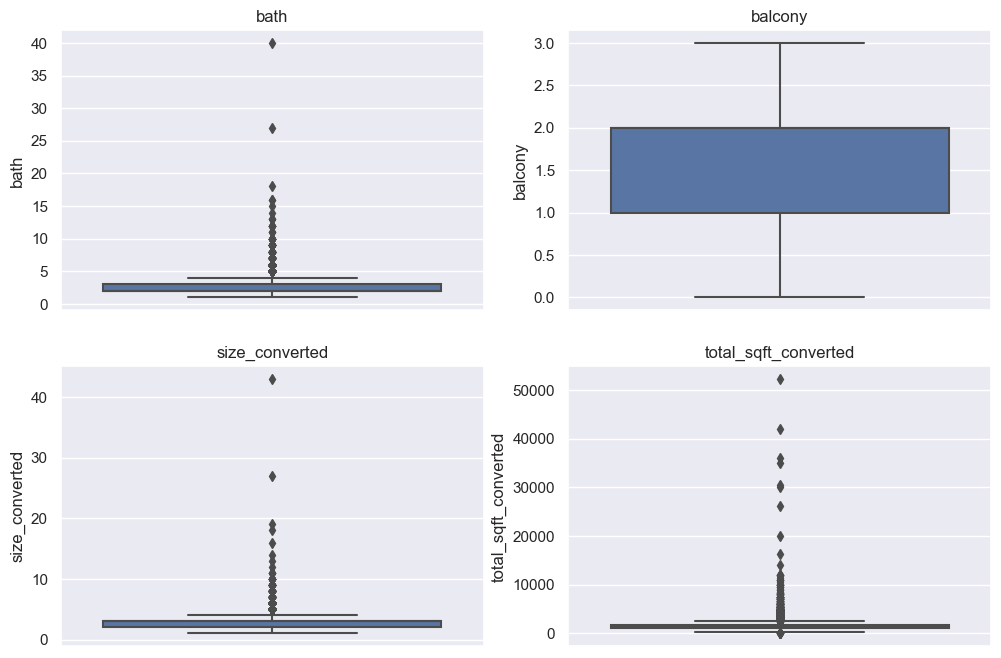

<Figure size 640x480 with 0 Axes>

In [56]:
f,a = plt.subplots(2,2,figsize = (12,8),dpi = 100)

ind = 0
for i in range(2):
    for j in range(2):
        if ind < len(num_col):
            sns.boxplot(y= data_new[num_col[ind]],ax=a[i,j])
            a[i,j].set_title(num_col[ind])
            ind+=1
        else:
            a[i,j].axis('off') 


plt.show()
plt.tight_layout()

In [57]:
data_new['bath'] = data_new['bath'].fillna(data_new['bath'].median())
data_new['size_converted'] = data_new['size_converted'].fillna(data_new['size_converted'].median())
data_new['total_sqft_converted'] = data_new['total_sqft_converted'].fillna(data_new['total_sqft_converted'].median())
data_new['balcony'] = data_new['balcony'].fillna(data_new['balcony'].mean())

In [58]:
data_new['location'].mode()

0    Whitefield
Name: location, dtype: object

In [59]:
data_new['society_converted'].mode()

0    Unknown
Name: society_converted, dtype: object

In [60]:
data_new['location'] = data_new['location'].fillna('Whitefield')
data_new['society_converted'] = data_new['society_converted'].fillna('Unknown')

In [61]:
data_new.isnull().sum()

area_type               0
availability            0
location                0
bath                    0
balcony                 0
size_converted          0
society_converted       0
total_sqft_converted    0
price_converted         0
dtype: int64

### Check the outliers

In [62]:
def outlier_check(data, n):
    
    for col in data_new.columns:
        if data[col].dtype == 'int64' or data[col].dtype=='float64' :
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range = Q1 - (n * IQR) 
            upper_range = Q3 + (n * IQR)   
                
            print(f"Number of outliers in {col} :", data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])       

In [63]:
outlier_check(data_new, 1.5)

Number of outliers in bath : 1032
Number of outliers in balcony : 0
Number of outliers in size_converted : 839
Number of outliers in total_sqft_converted : 1109
Number of outliers in price_converted : 1257


In [64]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [65]:
data_outlier = data_new.copy()

In [66]:
data_outlier.head()

,area_type,availability,location,bath,balcony,size_converted,society_converted,total_sqft_converted,price_converted
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,2.0,Coomee,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,4.0,Theanmp,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,3.0,Aklia R,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,3.0,Soiewre,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,2.0,Somumys,1200.0,51.00


In [67]:
for column in data_outlier.columns:
    if data_outlier[column].dtype != 'object':
        lr,ur = remove_outliers(data_outlier[column])
        data_outlier[column] = np.where(data_outlier[column] > ur, ur , data_outlier[column])
        data_outlier[column] = np.where(data_outlier[column] < lr, lr, data_outlier[column])

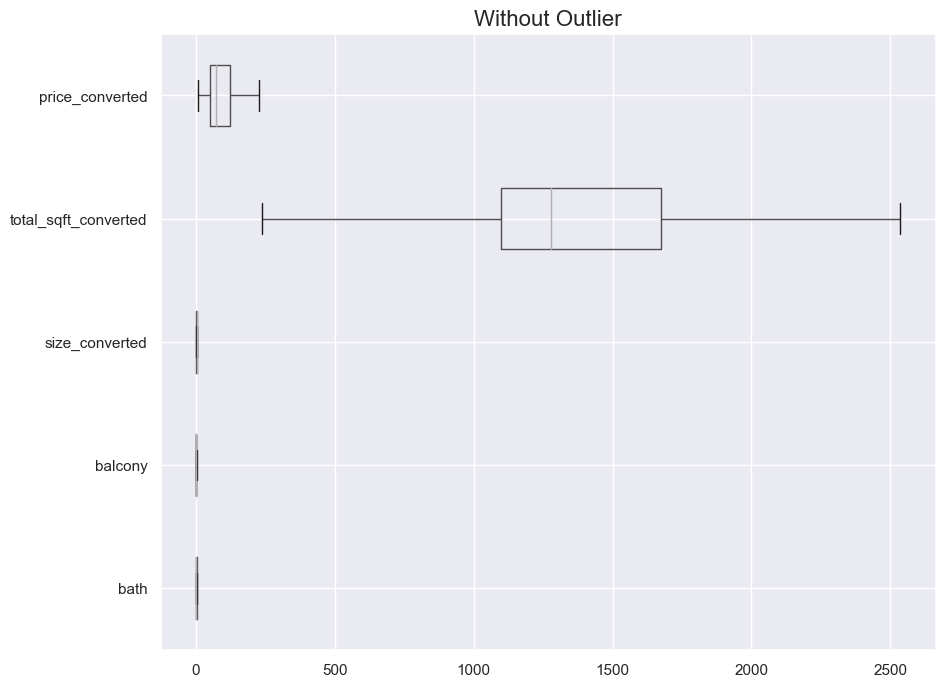

In [68]:
plt.figure(figsize=(10,8))
plt.title("Without Outlier", fontsize=16)
data_outlier.boxplot(vert=0)
plt.show()

In [69]:
data = data_outlier.copy()

In [70]:
data.head()

,area_type,availability,location,bath,balcony,size_converted,society_converted,total_sqft_converted,price_converted
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,2.0,Coomee,1056.000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.5,3.0,4.0,Theanmp,2536.875,120.00
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,3.0,Aklia R,1440.000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,3.0,Soiewre,1521.000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,2.0,Somumys,1200.000,51.00


In [71]:
# export the data for analysis purpose
#data.to_csv('new_data.csv')

In [72]:
# Categorical columns list : ['area_type', 'availability', 'location', 'society_converted']
# Calculate mean price for each category in the availability column
# Map the mean price to the original DataFrame

def target_encode(df, target):
   
    # Identify all object columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        mean_target = df.groupby(column)[target].mean()
        df[column + '_target_encoded'] = df[column].map(mean_target)
    
    return df

# Apply target encoding to the dataset
target_column = 'price_converted'
data = target_encode(data, target_column)

In [73]:
data = data.drop(columns=data.select_dtypes(include=['object']).columns)


In [74]:
data.dtypes

bath                                float64
balcony                             float64
size_converted                      float64
total_sqft_converted                float64
price_converted                     float64
area_type_target_encoded            float64
availability_target_encoded         float64
location_target_encoded             float64
society_converted_target_encoded    float64
dtype: object

In [75]:
data.head()

,bath,balcony,size_converted,total_sqft_converted,price_converted,area_type_target_encoded,availability_target_encoded,location_target_encoded,society_converted_target_encoded
0,2.0,1.0,2.0,1056.000,39.07,83.281387,90.815966,47.961496,53.810000
1,4.5,3.0,4.0,2536.875,120.00,145.716982,97.287483,114.704375,117.000000
2,2.0,3.0,3.0,1440.000,62.00,91.921824,97.287483,62.134777,68.788372
3,3.0,1.0,3.0,1521.000,95.00,83.281387,97.287483,115.348261,116.895455
4,2.0,1.0,2.0,1200.000,51.00,83.281387,97.287483,89.775000,85.332143


In [76]:
# Feature scaling

scaler = StandardScaler()

# Fit and transform the data
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [77]:
#Split the dataset into dependent and independent variable

feature = data.drop(['price_converted'],axis=1)
target = data[['price_converted']]

In [78]:
print(feature.shape)
print(target.shape)


(12770, 8)
(12770, 1)


## Training and Validation data

In [79]:
#split the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.25,random_state=155)

In [80]:
feature.shape

(12770, 8)

In [81]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9577, 8)
(3193, 8)
(9577, 1)
(3193, 1)


# Modelling

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

### Prediction on the training data

In [84]:
lr.predict(x_train)

array([[70.52458782],
       [59.3906507 ],
       [48.81276909],
       ...,
       [46.2202123 ],
       [86.61602923],
       [60.18655732]])

## Score On the training data

In [85]:
lr.score(x_train,y_train)

0.8118756865537777

### Prediction on the Validation data

In [86]:
lr.predict(x_test)

array([[ 44.0085192 ],
       [ 73.57957632],
       [114.19550145],
       ...,
       [128.29396138],
       [133.75610258],
       [ 55.76704079]])

## Score On the validation data

In [87]:
lr.score(x_test,y_test)

0.7927182655945

### K Fold cross validation to measure accuracy of our LinearRegression model

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), feature, target, cv = cv)

array([0.81506198, 0.81239741, 0.81501901, 0.80783425, 0.81097256])

In [98]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(feature,target):
    algos = {
        'linear_regression': {
            'model' : LinearRegression(),
            'params' : {
                #'normalize' : [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(feature,target) 
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(feature, target)

,model,best_score,best_params
0,linear_regression,0.812257,{}
1,lasso,0.811371,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.764863,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import specified ensemble algorithms 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [116]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'elasticnet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'randomforest' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gradientboosting' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [101]:
# lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}   

# ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# elastic net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}

# gradient boost hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

In [117]:
hyperparameters = {
    'randomforest' : rf_hyperparameters, 
    'gradientboosting' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'elasticnet' : enet_hyperparameters
}

In [103]:
from sklearn.model_selection import GridSearchCV

In [118]:
fitted_models = {}

for name, pipeline in pipelines.items():
    # create cross-validation object 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

    # fite model on X_train, y_train
    model.fit(x_train, y_train)

    # store model in dictionary
    fitted_models[name] = model

    # print message after model has been fitted
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
elasticnet has been fitted.
randomforest has been fitted.
gradientboosting has been fitted.


In [105]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(x_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [119]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.8111677478926627
ridge 0.8111682006430623
elasticnet 0.8111682885807202
randomforest 0.8709887598781563
gradientboosting 0.8698858098433394


In [120]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [125]:
results = []
for name, model in fitted_models.items():
    pred = model.predict(x_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    results.append([name, r2, mae])
results_df = pd.DataFrame(results, columns=['Model', 'R^2', 'MAE'])
results_df  
    


,Model,R^2,MAE
0,lasso,0.792721,19.344229
1,ridge,0.792717,19.345090
2,elasticnet,0.792718,19.345431
3,randomforest,0.858585,13.937379
4,gradientboosting,0.859640,14.143230


# Saving the Model

In [ ]:
import pickle

In [ ]:
# Model will be deployed in the cloud

with open('Linear_Model_RealEstateML.pkl','wb') as file:
    pickle.dump(lr,file)

In [ ]:
# DEPLOYMENT TAKES PLACE BY NEXT STEPS BY SOFTWARE DEVELOPERS

In [ ]:
with open('Linear_Model_RealEstateML.pkl','rb') as file:
    model = pickle.load(file)